<h1 style="text-align:center;">CREATING A BOOK RECOMMENDATION SYSTEM</h1>


<h2 style="text-align:center;">BUSINESS UNDERSTANDING  </h2>

<h3 style="text-align:left;">Project Overview  </h3>

Recommendation systems are powerful tools that use machine learning algorithms to provide suggestions that are useful to users based on behaviour or habit patterns or user data. 
A Book Recommendation System is a machine learning-based solution designed to suggest books to users based on their preferences and behavior. Recommendation systems enhance user engagement, drive sales, and improve customer satisfaction by providing personalized suggestions. This project aims to utlize advance machine learning tools to develop a book recommendation system that is tailored to meet personalized customers needs and preferences therefore helping customers with the challenge of locating or choosing which books to read considering the large electronic book presence. The data used is from Kaggle  [Kaggle](https://www.kaggle.com/datasets/somnambwl/bookcrossing-dataset/data)

There are two primary approaches to recommendation systems:

1. Collaborative Filtering – Uses user behavior and preferences to make recommendations.

2. Content-Based Filtering – Suggests books based on the features and attributes of previously liked books

<h3 style="text-align:left;">Business Problem</h3>

As earlier mentioned, with the rise of online and e-commerce services, customers face challenges in finding books that match their preferences. The goal is to develop a Book Recommendation System that offers personalized book suggestions, improving user experience and engagement.

<h3 style="text-align:left;">Project Objectives</h3>

Develop a recommendation system that provides tailored book suggestions.

Increase book sales by recommending books users are most likely to purchase.

Enhance customer retention by offering relevant recommendations.

Improve user engagement by making book discovery easier.

<h3 style="text-align:left;">Key Analysis Questions:</h3>

Which authors consistently receive high ratings?

Does the year of publication influence book ratings?

How accurate are the collaborative filtering recommendations?

How does class imbalance in ratings affect recommendation performance?

<h3 style="text-align:left;">Key Analysis Questions:</h3>

Which authors consistently receive high ratings?

Does the year of publication influence book ratings?

How accurate are the collaborative filtering recommendations?

How does class imbalance in ratings affect recommendation performance?

<h3 style="text-align:left;">Data Source</h3>

The dataset is obtained from Kaggle and consists of three files:

Books.csv – Includes details such as ISBN, title, author, year, and publisher.

Ratings.csv – Contains user ratings (0 to 10) linked to books via ISBN and user ID.

Users.csv – Provides user demographics, including age.

<h3 style="text-align:left;">Data Source</h3>

The dataset is obtained from Kaggle and consists of three files:

Books.csv – Includes details such as ISBN, title, author, year, and publisher.

Ratings.csv – Contains user ratings (0 to 10) linked to books via ISBN and user ID.

Users.csv – Provides user demographics, including age.

<h3 style="text-align:left;">Stakeholders</h3>

Customers – Expect personalized and accurate book recommendations.

Marketing Team – Uses insights for targeted promotions and advertising.

Data Scientists – Focus on optimizing the accuracy and scalability of the model.

Book Authors – Gain insights into audience preferences and book popularity.

Executives (CEO) – Assess the business impact of the recommendation system on revenue and customer retention.

<h3 style="text-align:left;">Methodology</h3>

The project follows the CRISP-DM framework:

Business Understanding – Define project goals and objectives.

Data Understanding – Explore and assess data quality.

Data Preparation – Clean and preprocess data.

Modeling – Implement recommendation models.

Evaluation – Assess model performance using relevant metrics.

<h3 style="text-align:left;">Data Understanding</h3>

A thorough exploration of the dataset ensures high-quality inputs for model training.

<h4 style="text-align:left;">A. Dataset Overview</h4>

Books Dataset – Provides ISBN, title, author, publisher, and publication year.

Users Dataset – Contains user demographics, including age.

Ratings Dataset – Includes user ratings for books (0-10 scale).

<h4 style="text-align:left;">B. Data Merging</h4>
Merged Ratings.csv with Users.csv using User-ID.

Further merged with Books.csv using ISBN to form a comprehensive dataset.

<h4 style="text-align:left;">C. Key Insights</h4>

Outliers – Unreasonable age values need capping or removal.

Missing Values –

Age column has ~27% missing values; will be imputed using the median.

Book-Author and Publisher have negligible missing values; will be dropped.

Image URLs will be dropped as they are irrelevant to analysis.

<h4 style="text-align:left;">D. Data Analysis</h4>

i) Univariate Analysis

Book Ratings – Understand rating distribution and trends.

User Ages – Identify major reading demographics.

ii) Bivariate Analysis

Age vs. Ratings – Understand rating preferences across age groups.

Authors vs. Ratings – Identify consistently high-rated authors.

Publisher vs. Ratings – Analyze publisher influence on book ratings.

Publication Year vs. Ratings – Determine if newer books receive better ratings.


<h3 style="text-align:left;">Modeling</h3>

We will develop and evaluate two types of recommendation models:

1. Collaborative Filtering

User-User Filtering – Recommends books based on user similarity.

Item-Item Filtering – Suggests books similar to previously liked books.

Techniques Used: SVD, Cosine Similarity.

Challenge:

Struggles with new users or books lacking sufficient interaction history (cold start problem).




<h3 style="text-align:left;">Modeling Evaluation</h3>

For evaluation, we use:

Precision – Measures how many recommended books are relevant.

Recall – Ensures a diverse and comprehensive recommendation list.

F1-Score – Balances precision and recall.

RMSE & MAE – Measures prediction accuracy.





<h3 style="text-align:left;">Expected Results</h3>

The primary focus is on precision, ensuring highly relevant recommendations that improve user satisfaction. The goal is to achieve a precision score of at least 75%, ensuring accurate and personalized book suggestions.

<h2 style="text-align:center;"> DATA PREPARATION </h2>

For this section of the project, data is prepared for analysis by loading our data for inspection, visualizing it , cleaning it and performing feature engineering to better improve the dataset for analysis. All important libraries releveant to our project are also imported at this point.

1. Started by importing relevant libraries and loading datasets

In [ ]:
#Import relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from surprise import Dataset, Reader, SVD
from surprise.model_selection import train_test_split
from surprise import accuracy
from surprise.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from scipy.sparse import csr_matrix
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.impute import SimpleImputer
from imblearn.under_sampling import RandomUnderSampler




We then load the datasets

In [41]:
#Load 'books.csv' dataset
Books = pd.read_csv('Books.csv',low_memory=False)
Books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [39]:
#Load 'ratings.csv' dataset
Ratings = pd.read_csv('Ratings.csv')
Ratings.head()



,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [38]:
Users = pd.read_csv('Users.csv')
Users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


### Merging the datasets
From our datasets above, there are 3 files. The ratings and users dataset share a common column 'User-ID' that can be merged into one. .

In [43]:
#perform the merge based on 'User-ID'
merged_df = pd.merge(Ratings,Users[['User-ID','Age']],on='User-ID',how='inner')

In [45]:
#keep only the selected columns
merged_df = merged_df[['User-ID','Book-Rating','Age','ISBN']]
merged_df.head()

,User-ID,Book-Rating,Age,ISBN
0,276725,0,NaN,034545104X
1,276726,5,NaN,0155061224
2,276727,0,16.0,0446520802
3,276729,3,16.0,052165615X
4,276729,6,16.0,0521795028


Merged the common ISBN columns on both the merged_df file and the Books file

In [ ]:
#merge based on 'ISBN'
merged_df1 = pd.merge(merged_df,Books,on='ISBN',how='inner')
merged_df1.head()

,User-ID,Book-Rating,Age,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,276725,0,NaN,034545104X,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
1,2313,5,23.0,034545104X,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
2,6543,0,34.0,034545104X,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
3,8680,5,2.0,034545104X,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
4,10314,9,NaN,034545104X,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...


Drop the Image URL columns since they are irrelevant in our study

In [47]:
# Drop unnecessary image URL columns
merged_df1 = merged_df1.drop(columns=['Image-URL-L','Image-URL-M','Image-URL-S'],axis=1)
merged_df1.head()

,User-ID,Book-Rating,Age,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,276725,0,NaN,034545104X,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
1,2313,5,23.0,034545104X,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
2,6543,0,34.0,034545104X,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
3,8680,5,2.0,034545104X,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
4,10314,9,NaN,034545104X,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books


In [49]:
#Get shape of the dataset
merged_df1.shape

(1031136, 8)

In [51]:
#Summary of our dataframe
merged_df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1031136 entries, 0 to 1031135
Data columns (total 8 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   User-ID              1031136 non-null  int64  
 1   Book-Rating          1031136 non-null  int64  
 2   Age                  753301 non-null   float64
 3   ISBN                 1031136 non-null  object 
 4   Book-Title           1031136 non-null  object 
 5   Book-Author          1031135 non-null  object 
 6   Year-Of-Publication  1031136 non-null  object 
 7   Publisher            1031134 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 70.8+ MB


# 2. Exploratory Data Analysis (EDA)

## I.Univariate Analysis

### A. Book Ratings Distribution
Helps to understand the overal view of users towards the books.

In [53]:
#Rename the columns
merged_df1.rename(columns={"User-ID": "UserID",
                   "Book-Rating":"Rating", 
                   "Book-Title": "Book_title", 
                    "Book-Author":"Author",
                   "Year-Of-Publication": "Publication_Year"}, inplace=True)

In [54]:
merged_df1['Rating'].value_counts()

0     647294
8      91804
10     71225
7      66402
9      60778
5      45355
6      31687
4       7617
3       5118
2       2375
1       1481
Name: Rating, dtype: int64

Plot a graph showing book ratings and distribution of book ratings 

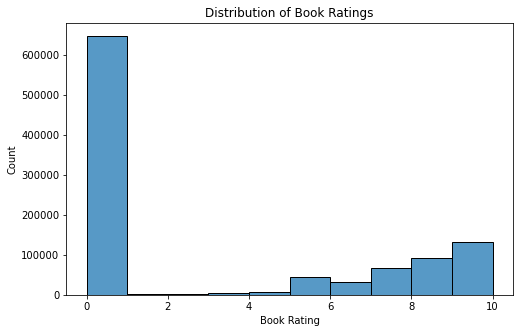

In [55]:
#Plot the graph
plt.figure(figsize=(8, 5))
sns.histplot(merged_df1['Rating'], bins=10, kde=False)

plt.title('Distribution of Book Ratings')
plt.xlabel('Book Rating')
plt.ylabel('Count')
plt.show()

#### Explanation
Many users rarely rated the books they have read making the rating of 0 dominant. This is a challenge and may skew the data.The other majority of ratings are concentrated in the higher range ratings of 8, 9, and 10, indicating that users tend to give positive ratings. There's a gradual decline in counts as ratings decrease from 10 to 1. Ratings between 1 and 4 are significantly less frequent, suggesting that users are less likely to give very low ratings.

### B. Most Common Authors
This shows the most frequent authors in the dataset based on the number of books they have authored and may reflect author's popularity.

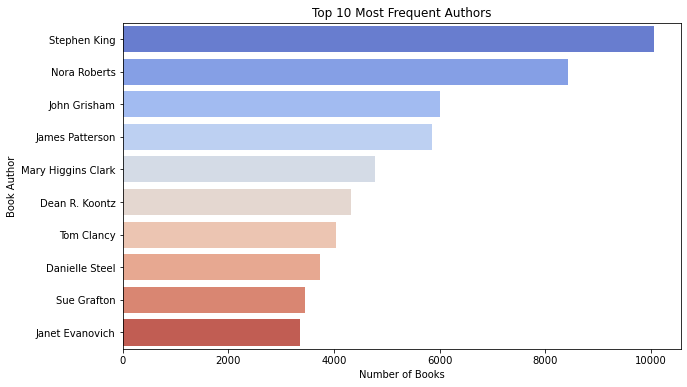

In [59]:
# Top 10 most frequent Authors
top_authors = merged_df1['Author'].value_counts().head(10)

# Plot for Top 10 Authors
plt.figure(figsize=(10, 6))
sns.barplot(x=top_authors.values, y=top_authors.index, palette='coolwarm')
plt.title('Top 10 Most Frequent Authors')
plt.xlabel('Number of Books')
plt.ylabel('Book Author')
plt.show()

### Explanation
Based on the graph above, Stephen King is the most frequent author in the dataset, with over 10,000 books while Janet Evanovich seems to be the least frequent authour from or graph. It gives a clear visual of how much more frequent Stephen King's books are compared to the rest, showing him as a highly prolific author in this dataset.

### C. Age distribution of USer

In [61]:
#Top 25 most frequent user ages
merged_df1['Age'].value_counts().head(25)

33.0    32862
29.0    30646
30.0    27201
32.0    26490
36.0    26096
28.0    25966
31.0    25964
34.0    25893
38.0    22396
27.0    22280
26.0    22107
25.0    21768
44.0    21510
37.0    21116
43.0    20612
35.0    19573
23.0    18793
24.0    18572
47.0    18517
52.0    17637
39.0    17002
46.0    16345
41.0    15900
40.0    15521
49.0    14345
Name: Age, dtype: int64

In [62]:
#Highest age of user 
merged_df1['Age'].max()

244.0

It is doubtful though but true according to our data


Find the mean, median of the users' age and plot a box plot and a normal bar graph for age and count

In [72]:
mean_age = merged_df1['Age'].mean()
median_age = merged_df1['Age'].median()
print(mean_age)
print(median_age)

37.39764848314286
35.0


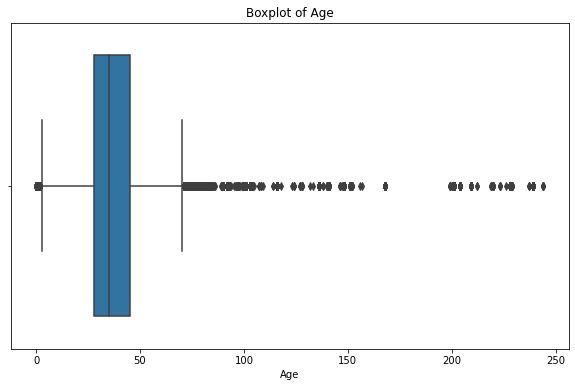

In [76]:
# Boxplot to visualize Age outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=merged_df1['Age'])
plt.title('Boxplot of Age')
plt.xlabel('Age')
plt.show()

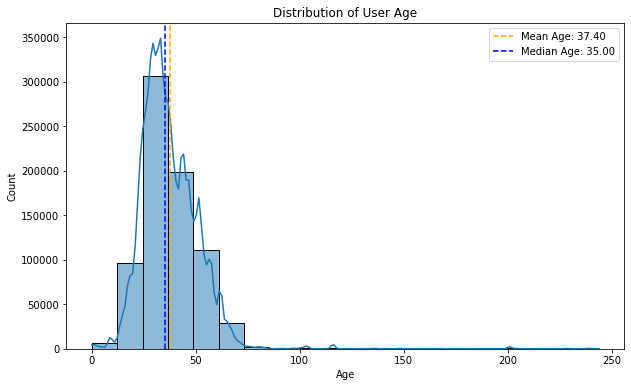

In [75]:
# Plot Distribution of User Age
plt.figure(figsize=(10, 6))
sns.histplot(merged_df1['Age'], bins=20, kde=True)
plt.axvline(mean_age, color='orange', linestyle='--', label=f'Mean Age: {mean_age:.2f}')
plt.axvline(median_age, color='blue', linestyle='--', label=f'Median Age: {median_age:.2f}')
plt.title('Distribution of User Age')
plt.xlabel('Age')
plt.legend()
plt.show()


The boxplot highlights a significant number of outliers indicating the need for data cleaning. Users with ages exceeding approximately 75 are flagged as potential outliers, suggesting there are abnormally high age values in the dataset. Values much higher than the median (around 29-33) extend far beyond the normal range of typical users.
Based on the distributions above, majority of the users in the dataset lie between the age 18 to 60. The mean lies at 37 years while the median lies at 35 years suggesting majority of the users are near that age. 
The ages between 25 and 40 seem to dominate the dataset with the peak around ages 29-33, suggesting that most users are young to middle-aged adults. The age distribution covers a wide range from very low to very high values (up to 244 years). There's a long tail extending into the older age ranges, with small numbers of users listed as having ages greater than 100 indicating presence of outliers.



### D. Top Publishers
This shows the top publishers in the dataset which might influence or point on  publisher popularity.

In [77]:
top_publishers = merged_df1['Publisher'].value_counts().head(10)
top_publishers

Ballantine Books            34724
Pocket                      31989
Berkley Publishing Group    28614
Warner Books                25506
Harlequin                   25027
Bantam Books                23598
Bantam                      20007
Signet Book                 19155
Avon                        17352
Penguin Books               17033
Name: Publisher, dtype: int64

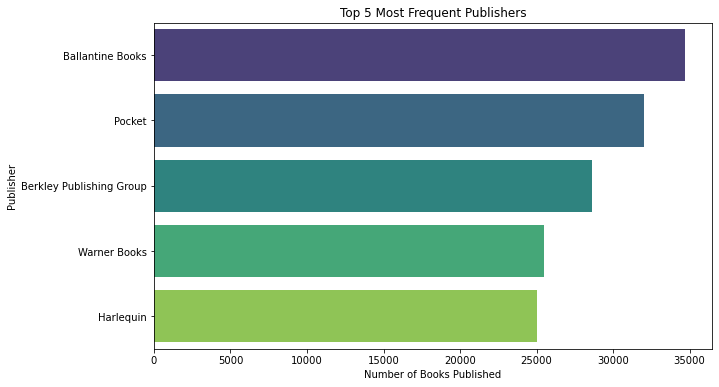

In [79]:
# Top 5 most frequent Publishers
top_publishers = merged_df1['Publisher'].value_counts().head(5)

# Plot for Top 5 Publishers
plt.figure(figsize=(10, 6))
sns.barplot(x=top_publishers.values, y=top_publishers.index, palette='viridis')
plt.title('Top 5 Most Frequent Publishers')
plt.xlabel('Number of Books Published')
plt.ylabel('Publisher')
plt.show()

#### 
Based on the graph above,Ballantine Books is the most frequent publisher, with over 34,000 books published, followed by Pocket. Other prominent publishers include Berkley Publishing Group, Warner Books, and Harlequin, with over 25,000 books each. 

## II. Bivariate Analysis

#### A. Book Rating vs User age
Explores the relationship between user age and the ratings they give to books.

In [80]:
# Group by 'Age' and calculate the average 'Book-Rating'
average_rating_by_age = merged_df1.groupby('Age')['Rating'].mean().reset_index()

# Rename the columns
average_rating_by_age.columns = ['Age', 'Average Book-Rating']
average_rating_by_age

,Age,Average Book-Rating
0,0.0,2.859180
1,1.0,3.464953
2,2.0,4.214953
3,3.0,4.923077
4,4.0,4.630996
...,...,...
136,228.0,0.492063
137,229.0,2.000000
138,237.0,3.333333
139,239.0,2.206897


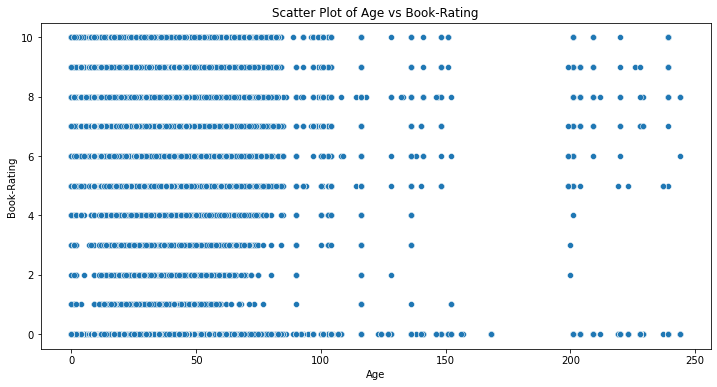

In [83]:
#Plot a Scatter plot of Book-Rating vs Age
plt.figure(figsize=(12, 6))
sns.scatterplot(x=merged_df1['Age'], y=merged_df1['Rating'])
plt.title('Scatter Plot of Age vs Book-Rating')
plt.xlabel('Age')
plt.ylabel('Book-Rating')
plt.show()



The scatterplot reveals the distribution of ratings based on user age. Users between 0 to approximately 90 years are densely distributed throughout the ratings. The presence of outliers may influence the observations made as the age is seen to range from 0 up to 244 years.

### B. Publisher vs. Average Book Rating
This examines whether certain publishers consistently publish books that receive higher ratings.

In [87]:
avg_ratings_publisher = merged_df1.groupby('Publisher')['Rating'].mean().sort_values(ascending=False).reset_index()
avg_ratings_publisher.head(10)

,Publisher,Rating
0,Editions P. Terrail,10.0
1,"Family CareWare, Inc.",10.0
2,Koehler &amp; Amelang Verlag MÃ?Â¼nchen Berlin,10.0
3,Koenisha Publications,10.0
4,Fandata Computer Services,10.0
5,Kristina DeVary,10.0
6,Crazy Pet Press,10.0
7,Stabur Pr,10.0
8,St.Martin's,10.0
9,KnÃ¶dler,10.0


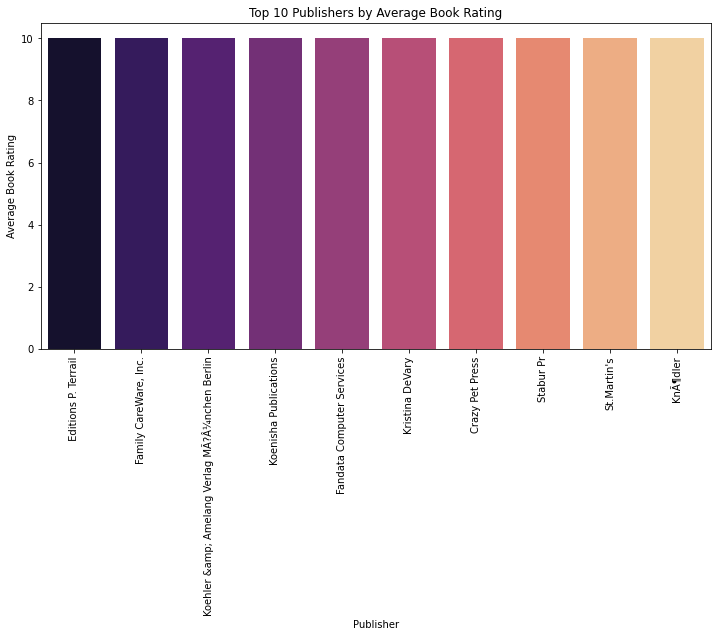

In [89]:
#Plot the graph
# Define a custom color palette
colors = sns.color_palette("crest", len(avg_ratings_publisher.head(10)))

plt.figure(figsize=(12, 6))
sns.barplot(x='Publisher', y='Rating', data=avg_ratings_publisher.head(10), palette='magma')
plt.xticks(rotation=90)
plt.title('Top 10 Publishers by Average Book Rating')
plt.xlabel('Publisher')
plt.ylabel('Average Book Rating')
plt.show()


The bar plot visually shows that all publishers in the top 10 have achieved a 10.0 average rating. The publishers could be from a diverse range of industries, from mainstream to niche publishing houses.In the analysis, books published by these top-rated publishers could be prominently featured in recommendation system for users who are likely to appreciate such content.Knowing which publishers consistently produce high-rated books allows for targeted advertising strategies, particularly for niche books that may attract specific types of readers. 


### C. Book Author vs. Average Book Rating
This helps determine which authors tend to receive higher or lower average ratings.

In [92]:
avg_ratings_author = merged_df1.groupby('Author')['Rating'].mean().sort_values(ascending=False).reset_index()
avg_ratings_author.head(10)

,Author,Rating
0,Cev Abs,10.0
1,Mitchell Ivers,10.0
2,The Mayo Clinic,10.0
3,Moira Huntley,10.0
4,Moira Anderson Allen,10.0
5,Denis Tillinac,10.0
6,Elizabeth Appell,10.0
7,Samantha Hunter,10.0
8,Gail Pheterson,10.0
9,CHARLOTTE BRONTE,10.0


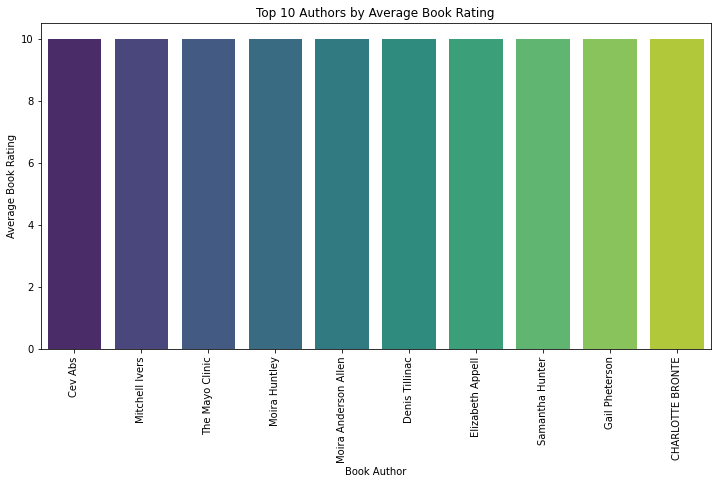

In [97]:
# Define a custom color palette
colors = sns.color_palette("crest", len(avg_ratings_author.head(10)))

#Plot the distribution
plt.figure(figsize=(12, 6))
sns.barplot(x='Author', y='Rating', data=avg_ratings_author.head(10), palette='viridis')#Get top 10 authors
plt.xticks(rotation=90)
plt.title('Top 10 Authors by Average Book Rating')
plt.xlabel('Book Author')
plt.ylabel('Average Book Rating')
plt.show()


All of the listed authors have a perfect rating of 10.0, indicating that their books have been highly rated by users.  Based on the plot we can assume that these authors are highly favored by their readers. The perfect ratings could be due to low rating count or a niche audience.
Books from these highly-rated authors could be prioritized in recommendation systems, especially for users who enjoy similar types of content or genres.

### D. Age vs. Publisher Preference
This analysis helps potray if users of certain age groups prefer books from specific publishers.

In [96]:
# Group by Publisher to get the average rating
avg_ratings_publisher = merged_df1.groupby('Publisher')['Rating'].mean().sort_values(ascending=False).reset_index()

# Select the top 15 publishers with the highest ratings
top_15_publishers = avg_ratings_publisher.head(15)

# Filter the merged_df1 dataset to only include the top 15 publishers
top_publishers_data = merged_df1[merged_df1['Publisher'].isin(top_15_publishers['Publisher'])]

# Group the data by Age and Publisher to calculate the average Book-Rating for each Age-Publisher combination
publisher_pref_by_age = top_publishers_data.groupby(['Age', 'Publisher'])['Rating'].mean().reset_index()
publisher_pref_by_age

,Age,Publisher,Rating
0,27.0,"Family CareWare, Inc.",10
1,28.0,Kristina DeVary,10
2,28.0,Stabur Pr,10
3,34.0,Fandata Computer Services,10
4,34.0,Koenisha Publications,10
5,37.0,Crazy Pet Press,10
6,43.0,St.Martin's,10
7,46.0,"St. Anthony Messenger P, US",10
8,48.0,Fallen Leaf Press,10
9,53.0,Kristina DeVary,10


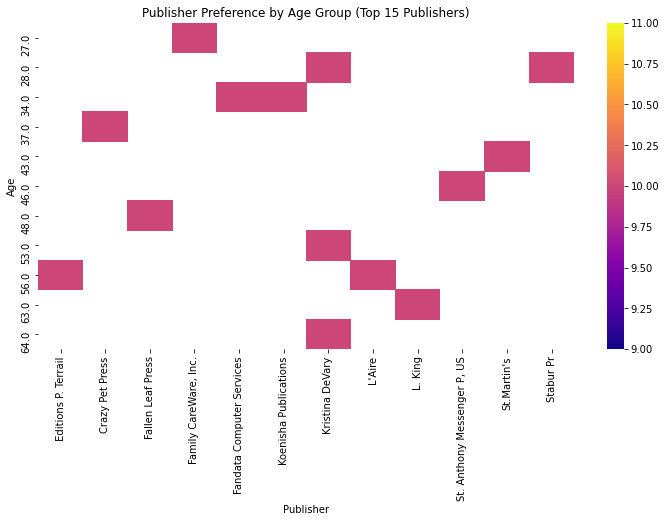

In [99]:
# Create the pivot table for the heatmap
pivot_table = publisher_pref_by_age.pivot(index='Age', columns='Publisher', values='Rating')

# Plot the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_table, cmap='plasma', annot=False)
plt.title('Publisher Preference by Age Group (Top 15 Publishers)')
plt.xlabel('Publisher')
plt.ylabel('Age')
plt.xticks(rotation=90)
plt.show()


The plot shows users ranging from 27 to 64 years. Some publishers may appeal more to younger readers, while others resonate with older audiences.Having a high concentration of ratings for certain publishers in specific age groups may indicate that those publishers focus on age-targeted content. The consistent high ratings across various age groups suggest that the books from these publishers have a wide appeal and are well-received by readers of different ages. If some publishers have more ratings across different age groups, it can indicate they have a broader market reach or are more popular among various demographics.



### E. Year of Publication vs. Average Book Rating
Analyzes the appeal of readers in terms of whether older books or more recent publications tend to receive higher ratings.


In [100]:
avg_ratings_year = merged_df1.groupby('Publication_Year')['Rating'].mean().reset_index()
avg_ratings_year

,Publication_Year,Rating
0,0,3.132415
1,1376,4.000000
2,1378,10.000000
3,1806,5.000000
4,1897,0.000000
...,...,...
113,2037,10.000000
114,2038,2.375000
115,2050,4.857143
116,DK Publishing Inc,2.333333


In [103]:
# Get the 75th percentile rating
top_ratings_threshold = avg_ratings_year['Rating'].quantile(0.75)  
top_ratings_year = avg_ratings_year[avg_ratings_year['Rating'] >= top_ratings_threshold]#to get years with top ratings
top_ratings_year

,Publication_Year,Rating
1,1376,4.000000
2,1378,10.000000
3,1806,5.000000
6,1901,4.571429
8,1904,10.000000
9,1906,5.000000
10,1908,10.000000
22,1925,3.600000
26,1929,4.041667
27,1930,3.955224


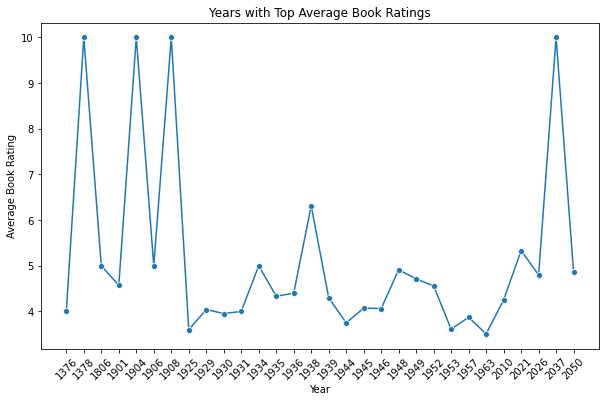

In [112]:
# Plot the graph for top ratings
plt.figure(figsize=(10, 6))
sns.lineplot(x='Publication_Year', y='Rating', data=top_ratings_year, marker='o')  # Adding markers for clarity
plt.title('Years with Top Average Book Ratings')
plt.xlabel('Year')
plt.ylabel('Average Book Rating')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

The ratings across different years show variability, indicating that some years produced books with significantly higher average ratings than others. By examining the overall trend across the years, you might observe some fluctutaion which may be as aresult of change in publishing quality, reader preferences, or the impact of historical events on literature.
The average ratings for more recent years indicates a potential resurgence in quality, or perhaps the influence of modern publishing trends and accessibility through various platforms.
Based on the graph we can see presence of outliers, particularly in  future years from 2026-2050 that will need to be removed.

### E. User vs. Book Rating
Helps to understand if certain users tend to give consistently higher while others may be more critical.

In [113]:
#Book rating by user
avg_ratings_user = merged_df1.groupby('UserID')['Rating'].mean().reset_index()

# Get the top 10 and bottom 10 users by average rating
top_10_users = avg_ratings_user.nlargest(10, 'Rating')
bottom_10_users = avg_ratings_user.nsmallest(10, 'Rating')
print(f"Top 10 users: {top_10_users}")
print(f"Bottom 10 users:{bottom_10_users}")

Top 10 users:      UserID  Rating
4        12    10.0
25       70    10.0
32       82    10.0
48      125    10.0
54      141    10.0
103     326    10.0
146     475    10.0
156     499    10.0
167     530    10.0
212     713    10.0
Bottom 10 users:    UserID  Rating
0        2     0.0
3       10     0.0
9       20     0.0
11      23     0.0
14      36     0.0
23      68     0.0
28      77     0.0
30      79     0.0
40      95     0.0
50     132     0.0


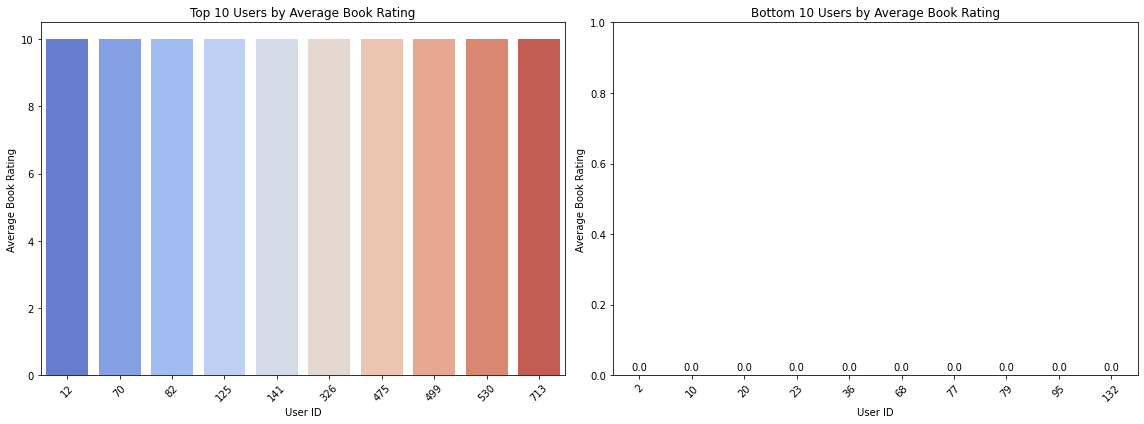

In [114]:
# Set up the figure and axes for side-by-side plots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Define a custom color palette
colors = sns.color_palette("coolwarm", 10)

# Plot for Top 10 Users
sns.barplot(x='UserID', y='Rating', data=top_10_users, ax=axes[0], palette=colors)
axes[0].set_title('Top 10 Users by Average Book Rating')
axes[0].set_xlabel('User ID')
axes[0].set_ylabel('Average Book Rating')
axes[0].tick_params(axis='x', rotation=45)

# Plot for Bottom 10 Users
sns.barplot(x='UserID', y='Rating', data=bottom_10_users, ax=axes[1], palette=colors)
axes[1].set_title('Bottom 10 Users by Average Book Rating')
axes[1].set_xlabel('User ID')
axes[1].set_ylabel('Average Book Rating')
axes[1].tick_params(axis='x', rotation=45)

# Add labels to zero-rating bars
for bar in axes[1].patches:
    axes[1].annotate(
        format(bar.get_height(), '.1f'),  # Add text as '0.0' for zero ratings
        (bar.get_x() + bar.get_width() / 2, bar.get_height()),  # Position label in the middle
        ha='center', va='center', size=10, xytext=(0, 8), textcoords='offset points'
    )
# Adjusting y-axis limits to ensure visibility 
axes[1].set_ylim(0, 1)

# Adjust layout
plt.tight_layout()
plt.show()


The top 10 users have an average book rating of 10.0 indicating that these users have only given perfect ratings to the books they have rated. Since all top users show the same maximum rating, it suggests that these users might have either a very favorable view of the books they rated, or they may have rated only a few select books that they felt deserved a perfect score which could point to a potential bias in their rating behavior.

The bottom 10 users have an average book rating of 0.0. This indicates that these users have not given any ratings above zero, implying they may not have engaged with the books in a way that they felt warranted a rating.
These users might not have found any books satisfactory enough to rate positively, suggesting dissatisfaction with the content or quality of books available to them. It's also possible that these users are not active readers or have not rated enough books to form a comprehensive view. This lack of ratings might negatively affect the overall average ratings for books in the system if these users account for a substantial number of ratings. 

The contrast between the top and bottom users highlights the variability in user engagement and satisfaction within the dataset. It suggests two extremes: highly engaged users with consistently positive feedback and users who do not engage meaningfully with the reading material.


## Cleaning of Data
For this section we will clean the dataset of any missing values, duplicates, and outliers.

In [115]:
#Checking for duplicates
merged_df1.duplicated().any()

False

From the above our dataset has no duplicated values

In [116]:
#Capping the age column to a reasonable range of 5 < x <100
merged_df1['Age'] = merged_df1['Age'].apply(lambda x: 5 if x < 5 else (70 if x > 70 else x))


In [117]:
#The 'Year-Of-Publication' column also had some outliers years exceeding the normal range that need to be removed. We will also convert the column into the right data type which is an interger column.
#Filter out non-integer values in the Year-Of-Publication column
merged_df1 = merged_df1[pd.to_numeric(merged_df1['Publication_Year'], errors='coerce').notnull()]

#Convert the Year-Of-Publication column to integers
merged_df1['Publication_Year'] = merged_df1['Publication_Year'].astype('int64')

#Remove rows where Year-Of-Publication is 2023 or later
merged_df1 = merged_df1[merged_df1['Publication_Year'] < 2024]

In [118]:
# Check for missing values
merged_df1.isnull().sum()

UserID                   0
Rating                   0
Age                 277815
ISBN                     0
Book_title               0
Author                   1
Publication_Year         0
Publisher                2
dtype: int64

In [119]:
#Percentage of missing values
merged_df1.isnull().mean()*100

UserID               0.000000
Rating               0.000000
Age                 26.944130
ISBN                 0.000000
Book_title           0.000000
Author               0.000097
Publication_Year     0.000000
Publisher            0.000194
dtype: float64

In [124]:
# Drop rows with missing values in the two columns
merged_df1 = merged_df1.dropna(subset=['Author', 'Publisher'])
#Checking for remaining missing values
merged_df1.isnull().mean()*100

UserID               0.000000
Rating               0.000000
Age                 26.944209
ISBN                 0.000000
Book_title           0.000000
Author               0.000000
Publication_Year     0.000000
Publisher            0.000000
dtype: float64

#### Replacing missing values
From the above results: 'Age' column has a large number of null values as it has approximately 27% missing data.
 As this column is vital, dropping it might affect our analysis thus we replace the missing values with the median using SimpleImputer.

In [125]:
#filling missing in Age column with median
imputer = SimpleImputer(strategy='median')
merged_df1['Age'] = imputer.fit_transform(merged_df1[['Age']])

In [126]:
#Checking for any remaining missing values
merged_df1.isnull().sum()

UserID              0
Rating              0
Age                 0
ISBN                0
Book_title          0
Author              0
Publication_Year    0
Publisher           0
dtype: int64

#### Age Distribution Rechecking 

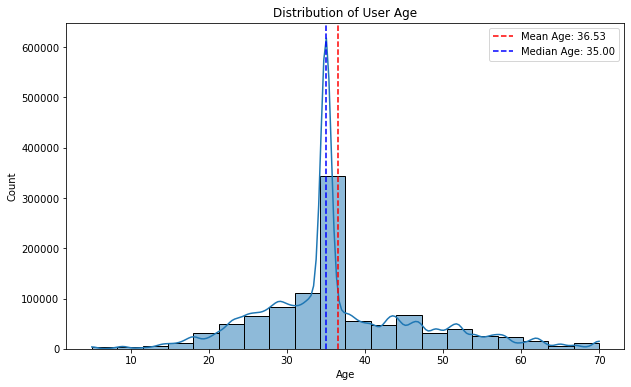

In [127]:
mean_age = merged_df1['Age'].mean()
median_age = merged_df1['Age'].median()

# Plot Distribution of User Age
plt.figure(figsize=(10, 6))
sns.histplot(merged_df1['Age'], bins=20, kde=True)
plt.axvline(mean_age, color='red', linestyle='--', label=f'Mean Age: {mean_age:.2f}')
plt.axvline(median_age, color='blue', linestyle='--', label=f'Median Age: {median_age:.2f}')
plt.title('Distribution of User Age')
plt.xlabel('Age')
plt.legend()
plt.show()

There mean reduced slightly to 36.53 while the median remained the same at 35. 
The distribution is improved with outliers being removed.

## Feature Engineering
From our dataset, a new column with age groups is created. the column helps to create a better understanding of book preference based on certain age groups.

In [128]:
#function for feature engineering
def age_group(age):
    if age < 18:
        return 'Child'
    elif age < 35:
        return 'Young Adult'
    elif age < 55:
        return 'Adult'
    else:
        return 'Senior'

# Apply the age_group function only on known ages
merged_df1['Age_Group'] = merged_df1['Age'].apply(lambda x: age_group(x) if pd.notnull(x) else np.nan)
merged_df1.head(5)

,UserID,Rating,Age,ISBN,Book_title,Author,Publication_Year,Publisher,Age_Group
0,276725,0,35.0,034545104X,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,Adult
1,2313,5,23.0,034545104X,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,Young Adult
2,6543,0,34.0,034545104X,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,Young Adult
3,8680,5,5.0,034545104X,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,Child
4,10314,9,35.0,034545104X,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,Adult


In [129]:
#Count of each age group
merged_df1['Age_Group'].value_counts()

Adult          595053
Young Adult    341169
Senior          72530
Child           22323
Name: Age_Group, dtype: int64

From the results above adults seem to be the majority with child ranking as the minority

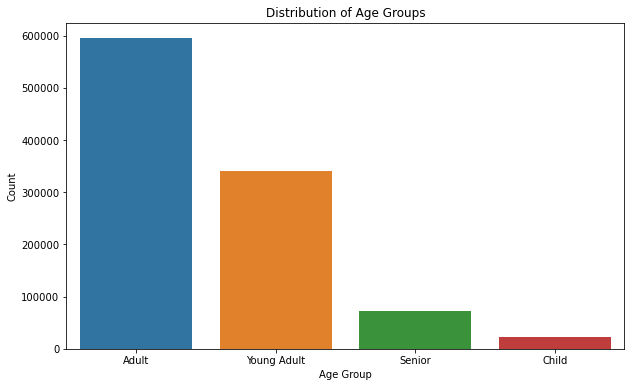

In [130]:
# Set the figure size
plt.figure(figsize=(10, 6))

# Create a count plot for Age Groups
sns.countplot(x='Age_Group', data=merged_df1, order=merged_df1['Age_Group'].value_counts().index)

# Set the title and labels
plt.title('Distribution of Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Count')

# Display the plot
plt.show()

The plot, agrees with the above count that potrays the adult category as the majority. Young Adult group has a substantial representation. The smaller representation is of the Seniors and Children..These findings may suggest that marketing strategies should primarily focus on adults and young adults, as they represent the majority of your user base.

## MODELLING
I utilized collaborative based filtering to build a recommendation system. 

### Collaborative Filtering
 We utlilize Singular Value Decomposition (SVD) an element of matrix factorization to perform collaborative filtering.

In [132]:
# Prepare data for Surprise
#Loading from surprise library
reader = Reader(rating_scale=(0, 10))
data = Dataset.load_from_df(merged_df1[['UserID', 'ISBN', 'Rating']], reader)

#### Hyperparameter Tuning
GridSearchCV from the surprise library is employed to optimize hyperparameters.

In [133]:
# Define the parameter grid for tuning
param_grid = {
    'n_factors': [30, 50],
    'reg_pu': [0.1, 0.2],
    'reg_qi': [0.1, 0.2]
}

# Perform GridSearchCV
grid_search = GridSearchCV(SVD, param_grid, measures=['rmse'], cv=2)
grid_search.fit(data)

# Get the best parameters
best_params = grid_search.best_params['rmse']
print("Best Parameters: ", best_params)

Best Parameters:  {'n_factors': 50, 'reg_pu': 0.2, 'reg_qi': 0.2}


50 latent factors gave the best results.
Regularization values of 0.2 for both users and items performed best in reducing errors

#### Model Training 
The analysis uses Singular Value Decomposition for collaborative filtering. It factorizes the user-item interaction matrix into lower-dimensional matrices which helps in capturing latent features that explain the user-book relationship.


In [134]:
# Model Training: Using SVD for collaborative filtering
#Set best parameters
best_model = SVD(n_factors=best_params['n_factors'], 
                  reg_pu=best_params['reg_pu'], 
                  reg_qi=best_params['reg_qi'])

# Fit the model
trainset, testset = train_test_split(data, test_size=0.2, random_state=42)
best_model.fit(trainset)

# Evaluate on the test set
predictions = best_model.test(testset)

# Extract true and predicted ratings
true_ratings = [pred.r_ui for pred in predictions]  # Actual ratings
predicted_ratings = [pred.est for pred in predictions]  # Predicted ratings

# Evaluate model performance on the test set
accuracy.rmse(predictions)  # Root Mean Square Error
accuracy.mae(predictions)   # Mean Absolute Error

RMSE: 3.4194
MAE:  2.7450


2.7449705931988215

A lower RMSE and MAE indicates better performance
Predicted rating differ from the true ratings by approximately 3.42 units based on the root mean square area a (RMSE) 
An MAE of 2.7450 indicates that on average, 
the predicted ratings differ from the true ratings by about 2.75 units.

## Model Evaluation
For this model's evaluation I employed the accuracy metrics mainly foucusing on **precision score**.


Check for class imbalance 


In [142]:
#Convert Ratings to Binary (1 if relevant, 0 if not)
# Define the threshold for relevance
threshold = 8

binary_true = [1 if rating >= threshold else 0 for rating in true_ratings]
binary_predicted = [1 if rating >= threshold else 0 for rating in predicted_ratings]

In [143]:
#Check the distribution of classes
class_distribution = pd.Series(binary_true).value_counts()

# Display the distribution
print("Class Distribution:")
print(class_distribution)

Class Distribution:
0    161623
1     44592
dtype: int64


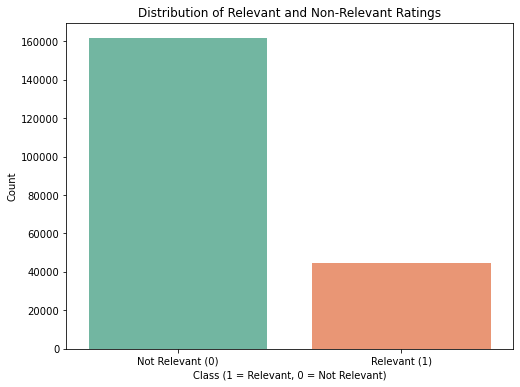

In [144]:
#Check distribution of classes for class imbalance

# Create a count plot
plt.figure(figsize=(8, 6))
sns.countplot(x=binary_true, palette='Set2')

# Labeling the plot
plt.xlabel('Class (1 = Relevant, 0 = Not Relevant)')
plt.ylabel('Count')
plt.title('Distribution of Relevant and Non-Relevant Ratings')
plt.xticks(ticks=[0, 1], labels=['Not Relevant (0)', 'Relevant (1)'])
plt.show()


There is a class imbalance as 'Non Relevant' class has a larger count compared to 'Relevant' class.

Handle the class imbalance by applying Random under sampling wherethe majority class is reduced thus balancing the dataset to avoid tampering with integrity of the data.

In [145]:
# Initialize the under-sampler
under_sampler = RandomUnderSampler(random_state=42)

# Create a DataFrame from binary ratings for resampling
data = pd.DataFrame({'True': binary_true, 'Predicted': binary_predicted})

# Apply under-sampling
X_under, y_under = under_sampler.fit_resample(data[['Predicted']], data['True'])

# Check new class distribution
new_class_distribution = pd.Series(y_under).value_counts()
print("New Class Distribution after Under-Sampling:")
print(new_class_distribution)

New Class Distribution after Under-Sampling:
1    44592
0    44592
Name: True, dtype: int64


In [146]:
##### apply the evaluation metrics to evaluate the performance of the model.
#Calculate Precision, Recall, and F1-Score
precision = precision_score(binary_true, binary_predicted)
recall = recall_score(binary_true, binary_predicted)
f1 = f1_score(binary_true, binary_predicted)
accuracy = accuracy_score(binary_true, binary_predicted)

# Print the evaluation metrics
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"Accuracy: {accuracy:.4f}")

Precision: 0.8163
Recall: 0.0497
F1-Score: 0.0938
Accuracy: 0.7921


#### Elaboration
Precision of 81% measures the proportion of relevant recommendations that were actually correct that is how many of the recommended books were truly relevant. It means that about 81.63% of the books recommended by your model were relevant (rated above the threshold of 8). This indicates that when our model recommends a book, there is a high chance that the recommendation is indeed a good fit for the user.

An accuracy score of 0.7921 indicates that the model is correct about 79.21% of the time. 


An F1-score of 0.0938 suggests that while the model is good at recommending relevant items, it fails to recommend most of the relevant items available.

A recall score of 0.0497  suggests that the model only identified 4.97% of all the relevant books that were actually present meaning many relevant books are being missed.




Based on the results above, our model meets our goal of having a precision score above 82% as it had a score of  0.8163
showing that about 81.63% of the books recommended by the model were relevant.